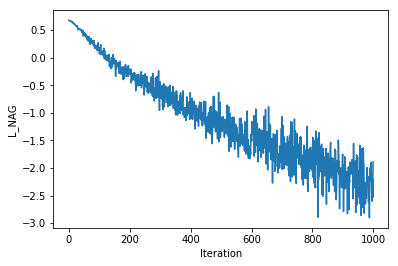

In [2]:
#NAG
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

#读入数据
from sklearn.datasets import load_svmlight_file
train_X,train_y=load_svmlight_file("a9a.txt")
train_X = train_X.toarray() #转换成numpy数组

test_X,test_y=load_svmlight_file("a9a.t",123)
test_X = test_X.toarray() #转换成numpy数组

#线性模型参数初始化，使用正态分布初始化。
W_num = train_X.shape[1]
mu,sigma=0,0.01 #均值与标准差
W=np.random.normal(mu,sigma,W_num)
b=np.random.normal(mu,sigma,1)

#设定初始动量和衰减因子
v_init=np.random.normal(mu,sigma,W_num)
v=v_init
mu = 0.9
learning_rate = 0.0001

#正则项
ld = 10
#批次大小
batch_size = 100

#训练集上的s值变量
train_linear = np.zeros(train_X.shape[0])
#测试集上的s值变量
test_linear = np.zeros(test_X.shape[0])

#迭代更新参数
iteration = 1000
#loss_train
J_train = np.zeros(iteration)
#loss_test
J_test = np.zeros(iteration)

for iters in range(iteration):
    #随机打乱数据
    rd = np.random.randint(0,train_X.shape[0]-1,batch_size)
    rd_test = np.random.randint(0,test_X.shape[0]-1,batch_size)
    
    #计算训练集上的s函数值和误差
    for i in rd:
        train_linear[i] = np.sum(train_X[i] * (W - mu*learning_rate*v)) + np.sum(b)
        J_train[iters] += -train_y[i]*train_linear[i] + np.log(1+np.exp(train_linear[i]))
    J_train[iters] = (1.0/batch_size) * J_train[iters]
            
    #计算测试集上的s函数值和误差
    for i in rd_test:
        test_linear[i] = np.sum(test_X[i] * (W - mu*learning_rate*v)) + np.sum(b)
        J_test[iters] += -test_y[i]*test_linear[i] + np.log(1+np.exp(test_linear[i]))
    J_test[iters] = (1.0/batch_size) * J_test[iters]
            
    #计算梯度以及参数更新位置
    gradient_w = np.zeros(train_X.shape[1])
    gradient_b = np.zeros(1)
    for i in rd:
        gradient_w += train_X[i] * (train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i])))
        gradient_b += train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i]))
    gradient_w = (1.0/batch_size) * gradient_w
    gradient_b = (1.0/batch_size) * gradient_b
    v = mu*v + gradient_w
    direction_w = -v
    direction_b = -gradient_b

    #参数更新
    W = W - learning_rate * direction_w
    b = b - learning_rate * direction_b

plt.xlabel("Iteration")  
plt.ylabel("L_NAG")
plt.plot(J_test)

/Users/wuyou/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in sqrt


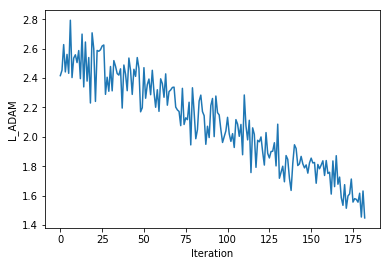

In [13]:
#ADAM
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

#读入数据
from sklearn.datasets import load_svmlight_file
train_X,train_y=load_svmlight_file("a9a.txt")
train_X = train_X.toarray() #转换成numpy数组

test_X,test_y=load_svmlight_file("a9a.t",123)
test_X = test_X.toarray() #转换成numpy数组

#线性模型参数初始化，使用正态分布初始化。
W_num = train_X.shape[1]
mu,sigma=0,0.1 #均值与标准差
W=np.random.normal(mu,sigma,W_num)
b=np.random.normal(mu,sigma,1)

#设定初始动量和衰减因子
v_init=np.random.normal(mu,sigma,W_num)
v=v_init
mu = 0.9
learning_rate = 0.0001

#正则项
ld = 10
#批次大小
batch_size = 100
#设定更新参数
s=np.random.normal(mu,sigma,W_num)
r=np.random.normal(mu,sigma,W_num)
epsi=0.00001
a=0.9
b=0.999 
learning_rate = 0.00005

#训练集上的s值变量
train_linear = np.zeros(train_X.shape[0])
#测试集上的s值变量
test_linear = np.zeros(test_X.shape[0])

#迭代更新参数
iteration = 1000
#loss_train
J_train = np.zeros(iteration)
#loss_test
J_test = np.zeros(iteration)

for iters in range(iteration):
    #随机打乱数据
    rd = np.random.randint(0,train_X.shape[0]-1,batch_size)
    rd_test = np.random.randint(0,test_X.shape[0]-1,batch_size)
    
    #计算训练集上的s函数值和误差
    for i in rd:
        train_linear[i] = np.sum(train_X[i] * W) + np.sum(b)
        J_train[iters] += -train_y[i]*train_linear[i] + np.log(1+np.exp(train_linear[i]))
    J_train[iters] = (1.0/batch_size) * J_train[iters]
            
    #计算测试集上的s函数值和误差
    for i in rd_test:
        test_linear[i] = np.sum(test_X[i] * W) + np.sum(b)
        J_test[iters] += -test_y[i]*test_linear[i] + np.log(1+np.exp(test_linear[i]))
    J_test[iters] = (1.0/batch_size) * J_test[iters]
            
    #计算梯度以及参数更新位置
    gradient_w = np.zeros(train_X.shape[1])
    gradient_b = np.zeros(1)
    for i in rd:
        gradient_w += train_X[i] * (train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i])))
        gradient_b += train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i]))
    gradient_w = (1.0/batch_size) * gradient_w
    gradient_b = (1.0/batch_size) * gradient_b
    s = a*s + (1-a)*gradient_w
    r = b*r + (1-b)*gradient_w*gradient_w
    s_ = s / (1 - a)
    r_ = r / (1 - b)
    direction_b = -gradient_b

    #参数更新
    W = W + learning_rate * s_/(np.sqrt(r)+epsi)
    b = b + learning_rate * direction_b

plt.xlabel("Iteration")  
plt.ylabel("L_ADAM")
plt.plot(J_test)

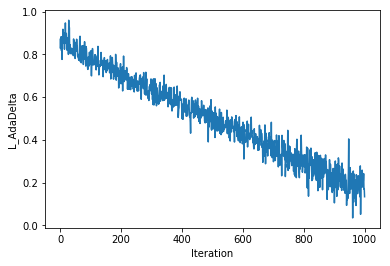

In [5]:
#AdaDelta
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

#读入数据
from sklearn.datasets import load_svmlight_file
train_X,train_y=load_svmlight_file("a9a.txt")
train_X = train_X.toarray() #转换成numpy数组

test_X,test_y=load_svmlight_file("a9a.t",123)
test_X = test_X.toarray() #转换成numpy数组

#线性模型参数初始化，使用正态分布初始化。
W_num = train_X.shape[1]
mu,sigma=0,0.1 #均值与标准差
W=np.random.normal(mu,sigma,W_num)
b=np.random.normal(mu,sigma,1)

#设定初始动量和衰减因子
v_init=np.random.normal(mu,sigma,W_num)
v=v_init
mu = 0.9
learning_rate = 0.0001

#正则项
ld = 10
#批次大小
batch_size = 100
#设定更新参数
v_init=np.random.normal(mu,sigma,W_num)
v=v_init
epsi=0.00001
mu=0.9
learning_rate = 0.00005

#训练集上的s值变量
train_linear = np.zeros(train_X.shape[0])
#测试集上的s值变量
test_linear = np.zeros(test_X.shape[0])

#迭代更新参数
iteration = 1000
#loss_train
J_train = np.zeros(iteration)
#loss_test
J_test = np.zeros(iteration)

for iters in range(iteration):
    #随机打乱数据
    rd = np.random.randint(0,train_X.shape[0]-1,batch_size)
    rd_test = np.random.randint(0,test_X.shape[0]-1,batch_size)
    
    #计算训练集上的s函数值和误差
    for i in rd:
        train_linear[i] = np.sum(train_X[i] * W) + np.sum(b)
        J_train[iters] += -train_y[i]*train_linear[i] + np.log(1+np.exp(train_linear[i]))
    J_train[iters] = (1.0/batch_size) * J_train[iters]
            
    #计算测试集上的s函数值和误差
    for i in rd_test:
        test_linear[i] = np.sum(test_X[i] * W) + np.sum(b)
        J_test[iters] += -test_y[i]*test_linear[i] + np.log(1+np.exp(test_linear[i]))
    J_test[iters] = (1.0/batch_size) * J_test[iters]
            
    #计算梯度以及参数更新位置
    gradient_w = np.zeros(train_X.shape[1])
    gradient_b = np.zeros(1)
    for i in rd:
        gradient_w += train_X[i] * (train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i])))
        gradient_b += train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i]))
    gradient_w = (1.0/batch_size) * gradient_w
    gradient_b = (1.0/batch_size) * gradient_b
    v = mu*v + (1-mu)*gradient_w*gradient_w
    direction_w = -learning_rate*1/np.sqrt(v+epsi)*gradient_w
    direction_b = -gradient_b

    #参数更新
    W = W - direction_w
    b = b - learning_rate * direction_b

plt.xlabel("Iteration")  
plt.ylabel("L_AdaDelta")
plt.plot(J_test)

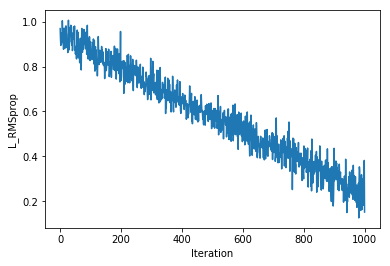

In [6]:
#RMSprop
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

#读入数据
from sklearn.datasets import load_svmlight_file
train_X,train_y=load_svmlight_file("a9a.txt")
train_X = train_X.toarray() #转换成numpy数组

test_X,test_y=load_svmlight_file("a9a.t",123)
test_X = test_X.toarray() #转换成numpy数组

#线性模型参数初始化，使用正态分布初始化。
W_num = train_X.shape[1]
mu,sigma=0,0.1 #均值与标准差
W=np.random.normal(mu,sigma,W_num)
b=np.random.normal(mu,sigma,1)

#设定初始动量和衰减因子
v_init=np.random.normal(mu,sigma,W_num)
v=v_init
mu = 0.9
learning_rate = 0.0001

#正则项
ld = 10
#批次大小
batch_size = 100
#设定更新参数
v_init=np.random.normal(mu,sigma,W_num)
v=v_init
epsi=0.00001
mu=0.9
learning_rate = 0.00005

#训练集上的s值变量
train_linear = np.zeros(train_X.shape[0])
#测试集上的s值变量
test_linear = np.zeros(test_X.shape[0])

#迭代更新参数
iteration = 1000
#loss_train
J_train = np.zeros(iteration)
#loss_test
J_test = np.zeros(iteration)

for iters in range(iteration):
    #随机打乱数据
    rd = np.random.randint(0,train_X.shape[0]-1,batch_size)
    rd_test = np.random.randint(0,test_X.shape[0]-1,batch_size)
    
    #计算训练集上的s函数值和误差
    for i in rd:
        train_linear[i] = np.sum(train_X[i] * W) + np.sum(b)
        J_train[iters] += -train_y[i]*train_linear[i] + np.log(1+np.exp(train_linear[i]))
    J_train[iters] = (1.0/batch_size) * J_train[iters]
            
    #计算测试集上的s函数值和误差
    for i in rd_test:
        test_linear[i] = np.sum(test_X[i] * W) + np.sum(b)
        J_test[iters] += -test_y[i]*test_linear[i] + np.log(1+np.exp(test_linear[i]))
    J_test[iters] = (1.0/batch_size) * J_test[iters]
            
    #计算梯度以及参数更新位置
    gradient_w = np.zeros(train_X.shape[1])
    gradient_b = np.zeros(1)
    for i in rd:
        gradient_w += train_X[i] * (train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i])))
        gradient_b += train_y[i] - np.exp(train_linear[i])/(1+np.exp(train_linear[i]))
    gradient_w = (1.0/batch_size) * gradient_w
    gradient_b = (1.0/batch_size) * gradient_b
    v = mu*v + (1-mu)*gradient_w*gradient_w
    direction_w = -learning_rate*1/np.sqrt(v+epsi)*gradient_w
    direction_b = -gradient_b

    #参数更新
    W = W - direction_w
    b = b - learning_rate * direction_b

plt.xlabel("Iteration")  
plt.ylabel("L_RMSprop")
plt.plot(J_test)